## Seminar 3

In [209]:
import numpy as np

DEFS

In [210]:
# Function to calculate geometric mean growth rate
def geometric_mean_growth_rate(profits):
    growth_rates = [(profits[i+1] / profits[i]) - 1 for i in range(len(profits)-1)]
    return np.prod([1 + rate for rate in growth_rates])**(1/len(growth_rates)) - 1

In [211]:
# Function to calculate arithmetic mean growth rate
def arithmetic_mean_growth_rate(profits):
    return (profits[-1] / profits[0])**(1/(len(profits)-1)) - 1

In [212]:
# Function to calculate projected profits for the next n years
def calculate_projected_profits(profits, growth_rate, n):
    projected_profits = [profits[-1] * (1 + growth_rate)**(i+1) for i in range(n)]
    return projected_profits

Eksamen 2016 - oppgave 2

In [213]:
# Define the profits for each year from 2010 to 2015
profits = [7, 20.2, 40.7, 86.9, 164.5, 206.1]

# Calculate geometric mean growth rate
geometric_growth_rate = geometric_mean_growth_rate(profits)

# Calculate arithmetic mean growth rate
arithmetic_growth_rate = arithmetic_mean_growth_rate(profits)

# Print the geometric and arithmetic mean growth rates
print("Geometric mean growth rate from 2010 to 2015:", geometric_growth_rate)
print("Arithmetic mean growth rate from 2010 to 2015:", arithmetic_growth_rate)

# Calculate projected profits for the next five years based on the geometric mean growth rate
n_years = 5
geometric_projected_profits = calculate_projected_profits(profits, geometric_growth_rate, n_years)

# Calculate projected profits for the next five years based on the arithmetic mean growth rate
arithmetic_projected_profits = calculate_projected_profits(profits, arithmetic_growth_rate, n_years)

# Print projected profits for the next five years based on the geometric mean growth rate
print("\nProjected profits for the next five years based on the geometric mean growth rate:")
for year, profit in enumerate(geometric_projected_profits, start=2016):
    print(year, ":", round(profit, 2))

# Print projected profits for the next five years based on the arithmetic mean growth rate
print("\nProjected profits for the next five years based on the arithmetic mean growth rate:")
for year, profit in enumerate(arithmetic_projected_profits, start=2016):
    print(year, ":", round(profit, 2))


Geometric mean growth rate from 2010 to 2015: 0.9669620930519387
Arithmetic mean growth rate from 2010 to 2015: 0.9669620930519389

Projected profits for the next five years based on the geometric mean growth rate:
2016 : 405.39
2017 : 797.39
2018 : 1568.43
2019 : 3085.05
2020 : 6068.17

Projected profits for the next five years based on the arithmetic mean growth rate:
2016 : 405.39
2017 : 797.39
2018 : 1568.43
2019 : 3085.05
2020 : 6068.17


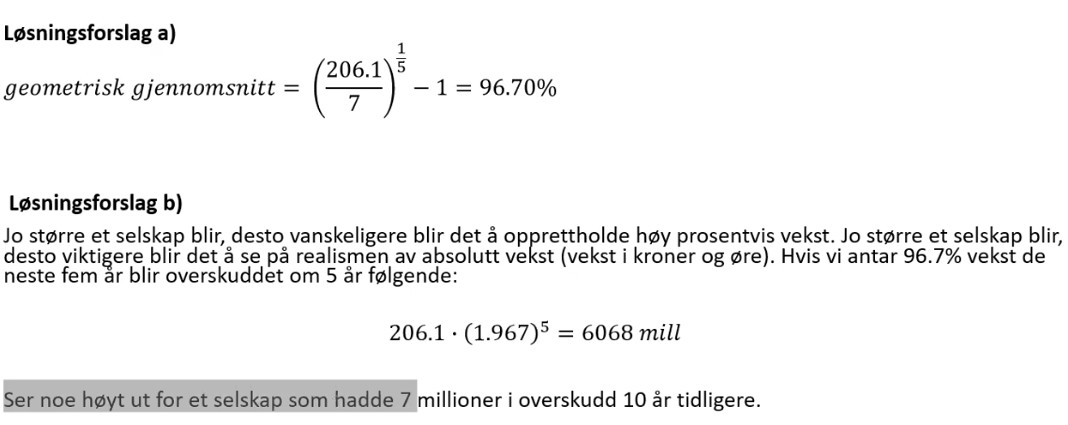

Fundamental vekst

In [214]:
# Function to calculate Equity Reinvestment Rate
def calculate_equity_reinvestment_rate(net_capex, change_in_working_capital, debt_ratio, net_income):
    equity_reinvestment_rate = (net_capex + change_in_working_capital) * (1 - debt_ratio) / net_income
    return equity_reinvestment_rate

# Function to calculate Expected Growth in Net Income
def calculate_expected_growth_net_income(equity_reinvestment_rate, roe):
    expected_growth_net_income = equity_reinvestment_rate * roe
    return expected_growth_net_income

# Function to calculate Reinvestment Rate
def calculate_reinvestment_rate_EBIT(net_capex, change_in_wc, ebit, tax_rate):
    reinvestment_rate = (net_capex + change_in_wc) / (ebit * (1 - tax_rate))
    return reinvestment_rate

# Function to calculate Return on Capital (ROC)
def calculate_roc(ebit, tax_rate, bv_debt, bv_equity):
    roc = (ebit * (1 - tax_rate)) / (bv_debt + bv_equity)
    return roc

# Function to calculate Expected Growth in EBIT (gEBIT)
def calculate_expected_growth_ebit(reinvestment_rate, roc):
    expected_growth_ebit = reinvestment_rate * roc
    return expected_growth_ebit


## KAP 12

Klipp inn fra semianre 3 inn i gpt 4

In [215]:
def calculate_present_value(cash_flows, discount_rate):
    present_value = sum([cf / (1 + discount_rate) ** (i+1) for i, cf in enumerate(cash_flows)])
    return present_value

def calculate_terminal_value(last_cash_flow, growth_rate, discount_rate):
    terminal_value = last_cash_flow * (1 + growth_rate) / (discount_rate - growth_rate)
    return terminal_value

def calculate_firm_value(cash_flows, growth_rate, discount_rate, terminal_growth_rate):
    # Estimate present value of cash flows during growth period
    present_value_growth_period = calculate_present_value(cash_flows[:-1], discount_rate)

    # Estimate terminal value
    terminal_value = calculate_terminal_value(cash_flows[-1], terminal_growth_rate, discount_rate)

    # Total firm value
    firm_value = present_value_growth_period + terminal_value
    return firm_value

def calculate_value_constant_growth(expected_cash_flow_next_period, discount_rate, growth_rate):
    value = expected_cash_flow_next_period / (discount_rate - growth_rate)
    return value

EKSAMEN 2020, Oppgave 2 - Konte

Data

In [216]:
ebit = [2015, 2215, 2255, 2275, 2495]  # EBIT for hvert år
depreciation = [415, 415, 465, 465, 485]  # Avskrivning for hvert år
capex = [815, 315, 1115, 855, 845]  # Capex for hvert år
non_cash_working_capital = [430, 415, 455, 463, 467, 511]  # Non-cash arbeidskapital for hvert år   - legger til starten fremst!

## arbeidskraptial = 430 #startkapitallen - ligger fremst
antall_aar = 5

tax_rate = 0.4  # Skattesats
growth_rate = 0.03  # Langsiktig vekstrate i FCFF
discount_rate = 0.08  # WACC
debt = 5000  # Rentebærende gjeld ved utgangen av år 0

Free cash flow - plasser i figur i valuation i seminar 3 modellen

In [217]:
def calculate_fcfe(ebit, depreciation, capex, non_cash_working_capital, tax_rate):
    fcfe_list = []
    for i in range(len(ebit)):
        fcfe = ebit[i] * (1 - tax_rate) + depreciation[i] - capex[i] - (non_cash_working_capital[i+1] - non_cash_working_capital[i])
        fcfe_list.append(fcfe)
    return fcfe_list

Discount factor

In [218]:
def calculate_wacc_per_year(wacc, ebit):
    wacc_per_year = [round((1+wacc) ** (i + 1), 2) for i in range(len(ebit))]
    return wacc_per_year

Combine - fcfe / wacc

In [219]:
def calculate_fcfe_wacc_ratio(fcfe_list, wacc_list):
    ratio_list = [round(fcfe / wacc, 2) for fcfe, wacc in zip(fcfe_list, wacc_list)]
    return ratio_list

Summere verdien

In [220]:
def calculate_list_sum(list):
    total = sum(list)
    return total

Terminal value

In [221]:
def calculate_terminal_value(fcfe_year_5, growth_rate, discount_rate):
    terminal_value = fcfe_year_5 * (1 + growth_rate) / (discount_rate - growth_rate)
    return terminal_value

In [222]:
def calculate_present_value_of_tv(tv_year_5, discount_rate, num_years):
    present_value = tv_year_5 / (1 + discount_rate) ** num_years
    return present_value

In [223]:
def calculate_equity_value(sum_horizon, TV_todays_value, debt):
    equity_value = sum_horizon + TV_todays_value - debt
    return equity_value

DATABEHANDLING MED DEFINISJONENE

In [224]:
# Estimate FCFE
fcfe = calculate_fcfe(ebit, depreciation, capex, non_cash_working_capital, tax_rate)
print("FCFE:", fcfe)

FCFE: [824.0, 1389.0, 695.0, 971.0, 1093.0]


In [225]:
# Calculate WACC for each year
wacc_per_year = calculate_wacc_per_year(discount_rate, ebit)
print("WACC for each year:", wacc_per_year)

WACC for each year: [1.08, 1.17, 1.26, 1.36, 1.47]


In [226]:
# Calculate FCFE / WACC ratio for each year
fcfe_wacc_ratio = calculate_fcfe_wacc_ratio(fcfe, wacc_per_year)
print("FCFE / WACC ratio for each year:", fcfe_wacc_ratio)

FCFE / WACC ratio for each year: [762.96, 1187.18, 551.59, 713.97, 743.54]


In [227]:
sum_of_fcfe_wacc_ratio = calculate_list_sum(fcfe_wacc_ratio)
print (sum_of_fcfe_wacc_ratio)

3959.2400000000002


Terminal value

In [228]:
TV_5 = calculate_terminal_value(fcfe[-1] , growth_rate, discount_rate)
print("Terminal Value i år 5:", TV_5)

Terminal Value i år 5: 22515.8


Opprinnelig terminal value i år 0

In [229]:
# Calculate present value of TV in year 0
present_value_tv_year_0 = calculate_present_value_of_tv(TV_5, discount_rate, antall_aar)
print("Present Value of TV i år 0:", present_value_tv_year_0)

Present Value of TV i år 0: 15323.875147772573


Trekker ut debt og annet

In [230]:
# Calculate equity value
equity_value = calculate_equity_value(sum_of_fcfe_wacc_ratio, present_value_tv_year_0 , debt)
print("Equity Value:", equity_value)

Equity Value: 14283.115147772573


DEL 3 - KAP 17 - Relativ verdsettelse

Verdsetter til sammenlignbare leiligheter for eiendomsmeglere, men i aksjemarket bruker vi en multiple

P/E ratio

In [1]:
def calulate_basic_equity_discounted_cashflow(DPS, r, g ):
    return DPS/(r-g)

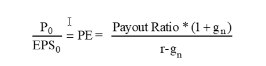

In [3]:
def calulate_both_sides_forward_EPS(P0, EPS):
    return P0/EPS

In [5]:
def PE_2(payout_ratio, r, g):
    return payout_ratio * (1+g)/(r-g)